# Important necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

# Data extraction and data prepration/preporcessing

In [2]:
df=pd.read_csv("salary data.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
df.drop("Unnamed: 0",axis=True,inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Exploratory Data Analysis

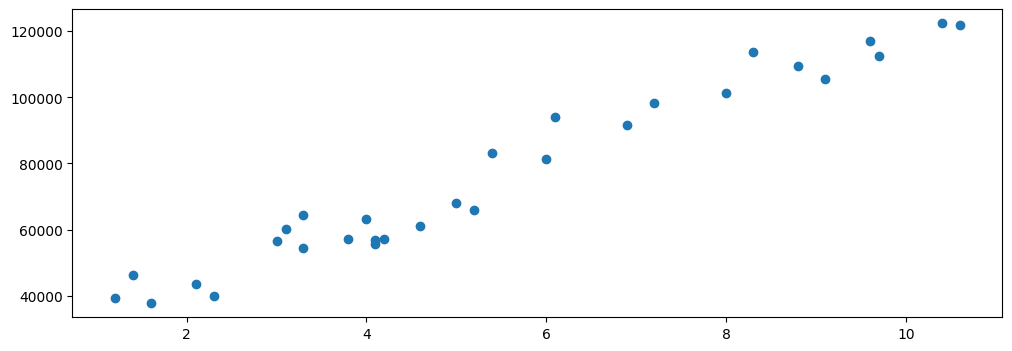

In [29]:
plt.figure(figsize=(12,4))
plt.scatter(df["YearsExperience"],df["Salary"])
plt.show()

In [6]:
df.corr()    #Correlation range -1 to 1 ----> -1 means strongly negative correlation
                # +1 means strongly negative correlation
                # 0 no correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Creating and Fitting Model for Linear Regression

In [9]:
model=LinearRegression()

In [14]:
#DataFrame type data ----- 2D
x=df.drop("Salary",axis=1)  # Input columns
x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [13]:
#Series type data ---- 1D
y=df["Salary"]   # Output Columns
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [15]:
model.fit(x,y)

LinearRegression()

In [16]:
m=model.coef_
m

array([9449.96232146])

In [17]:
c=model.intercept_
c

np.float64(24848.203966523208)

# Prediction on unknown data

In [18]:
model.predict([[3.5]])

array([57923.07209162])

In [19]:
model.predict([[9.3]])

array([112732.85355606])

In [21]:
y_pred=model.predict(x)

In [22]:
y_pred

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

In [24]:
mean_squared_error(y,y_pred)

np.float64(31270951.722280957)

# Model Evaluation

In [26]:
mse=mean_squared_error(y,y_pred)
mse

np.float64(31270951.722280957)

In [27]:
rmse=np.sqrt(mse)
rmse

np.float64(5592.043608760661)

In [31]:
r2=r2_score(y,y_pred)
r2

0.9569566641435086

In [32]:
1-(np.sum(np.square(y-y_pred))/np.sum(np.square(y-y.mean())))

np.float64(0.9569566641435086)

In [33]:
n=len(y)
k=1
n,k

(30, 1)

In [35]:
n,k=x.shape[0],x.shape[1]
n,k

(30, 1)

In [36]:
adj_r2=1-((1-r2)*(n-1)/(n-k-1))
adj_r2

0.9554194021486339